

# Project: Investigate a Dataset - [noshowappointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>    
<li><a href="#Cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">limitations</a></li> 
</ul>

#  Introduction
The medical appointment dataset contains information about appointments . It was created to study what factors were useful in predicting if patients would attend thier appointments or miss it. It contains basic information on the patients as well as whether or not the patient show at the appointment . In addition, it indicates if the patient received SMS.

 



## Question(s) for Analysis
Is age or gender indicative of whether a patient will make their appointments?
Do Hypertension coincide with fewer no shows?
Do some Neighbourhood have more no shows than others?


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties
 The following commands will low that dataset into a pandas dataframe and display basic information about it and discover any new issues need to be fixed.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
sum(df.duplicated())

0

In [9]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [10]:
df.query('Age<=0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [11]:
(df.isnull()).value_counts()

PatientId  AppointmentID  Gender  ScheduledDay  AppointmentDay  Age    Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show
False      False          False   False         False           False  False          False        False         False     False       False    False         False      110527
dtype: int64

<a id='Cleaning'></a>
# Data Cleaning
fixing all issues that been discussed above and make the data easier to analyze
 

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# changing columns types to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

changing ScheduledDay and AppointmentDay datatypes to datatime to be more flexible

In [13]:
#correcting data types names
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show': 'No_show'}, inplace = True)

changing Hipertension and Handcap to correct them to make the data more reliable

In [14]:
#correcting Age in the data set to the mean 
age_correction=int(df['Age'].mean())
df[df['Age'] <= 0]=age_correction

its not really true that people with 0 age or less make the appointment

In [15]:
showed= df['No_show']=='No'

In [16]:
noshow= df['No_show']=='Yes'

In [17]:
df[showed].count()

PatientId         85307
AppointmentID     85307
Gender            85307
ScheduledDay      85307
AppointmentDay    85307
Age               85307
Neighbourhood     85307
Scholarship       85307
Hypertension      85307
Diabetes          85307
Alcoholism        85307
Handicap          85307
SMS_received      85307
No_show           85307
dtype: int64

this display the people who come the appointment all thier data

In [18]:
df[noshow].count()

PatientId         21680
AppointmentID     21680
Gender            21680
ScheduledDay      21680
AppointmentDay    21680
Age               21680
Neighbourhood     21680
Scholarship       21680
Hypertension      21680
Diabetes          21680
Alcoholism        21680
Handicap          21680
SMS_received      21680
No_show           21680
dtype: int64

this display the people who not come the appointment all thier data

In [19]:
 df = df[df.No_show != 37]

In [20]:
sum(df.duplicated())

0

In [21]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  int64  
 8   Hypertension    106987 non-null  int64  
 9   Diabetes        106987 non-null  int64  
 10  Alcoholism      106987 non-null  int64  
 11  Handicap        106987 non-null  int64  
 12  SMS_received    106987 non-null  int64  
 13  No_show         106987 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

lets try visualization examples about the data and make some useful information to understand

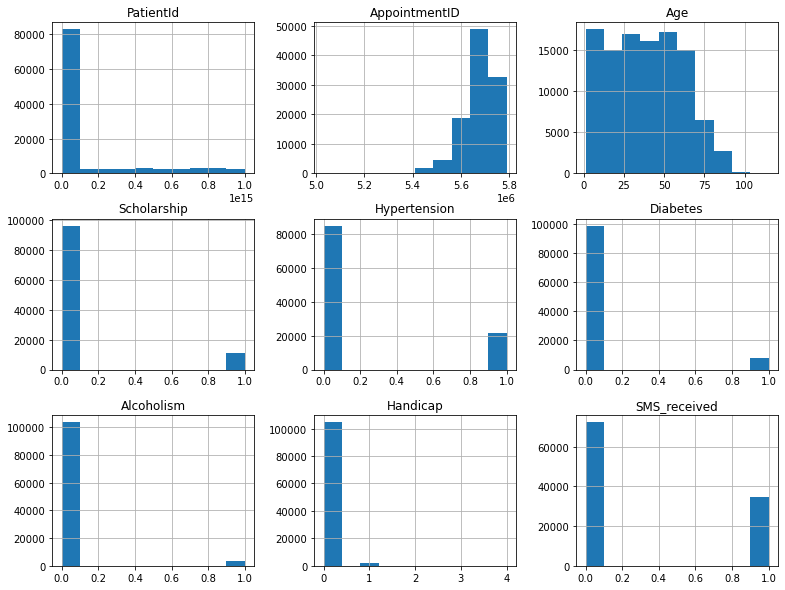

In [23]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# exploring all the data 
df.hist(figsize=(13,10));

D:\pro\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


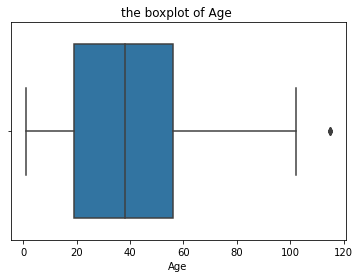

the 1st quartile= 19
the median= 38
the 3st quartile= 56 


In [24]:
#viewing age boxplot declares their quartiles 
sns.boxplot(df.Age)
plt.title('the boxplot of Age ')
plt.show()
print('the 1st quartile= 19\nthe median= 38\nthe 3st quartile= 56 ')

In [25]:
#making function for histogram to comparing with show and no show
def histplot(first):
    first[showed].hist(alpha=0.5,label= 'show' )
    first[noshow].hist(alpha=0.5,label= 'no show' )
    plt.ylabel("show")
    plt.legend()

making function for histogram to comparing with show and no show

showed Appointments Mean Age= 39.08
no show Appointments Mean Age= 35.33


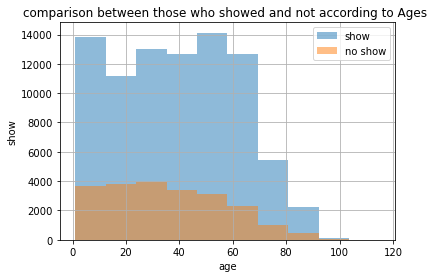

In [26]:
#compare age to show and not show
#call plot function
histplot(df['Age'])
plt.xlabel('age')
plt.title("comparison between those who showed and not according to Ages ")
print('showed Appointments Mean Age= {:.2f}'.format(df.Age[showed].mean()))
print('no show Appointments Mean Age= {:.2f}'.format(df.Age[noshow].mean()))

Text(0, 0.5, 'Numbers')

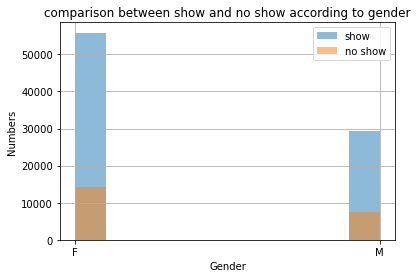

In [27]:
#compare gender to show and not show
#call plot function
histplot(df['Gender'])
plt.title('comparison between show and no show according to gender')
plt.xlabel('Gender')
plt.ylabel('Numbers')

comparing gender to show and not show and proves that female attended more than male 

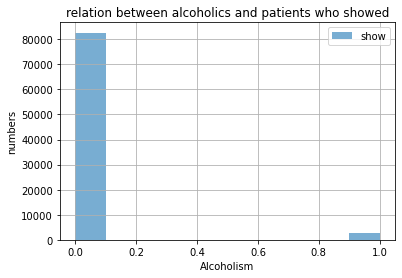

In [28]:
# relation between alcoholics and patients who showed proves that most of them are low Alcoholism 
df.Alcoholism[showed].hist(alpha=0.6,label= 'show' )
plt.xlabel("Alcoholism")
plt.ylabel("numbers")
plt.title("relation between alcoholics and patients who showed")
plt.legend()

In [29]:
#compare those who showed according to Neighbourhood
df.Neighbourhood[showed].value_counts()

JARDIM CAMBURI       6154
MARIA ORTIZ          4369
RESISTÊNCIA          3360
JARDIM DA PENHA      3224
CENTRO               2590
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

comparing those who showed according to Neighbourhood

In [30]:
#compare those who did not show according to Neighbourhood
df.Neighbourhood[noshow].value_counts()

JARDIM CAMBURI                 1432
MARIA ORTIZ                    1194
ITARARÉ                         898
RESISTÊNCIA                     875
CENTRO                          692
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

comparing those who did not show according to Neighbourhood

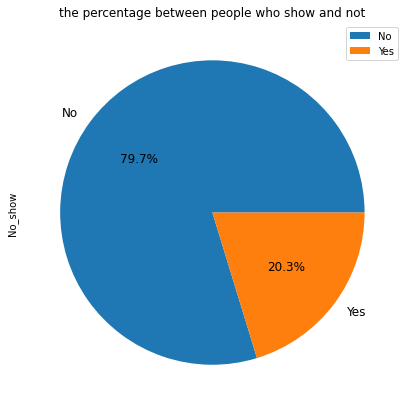

In [31]:
# the percentage between people who show and not
df['No_show'].value_counts().plot.pie(figsize=(7,7), autopct='%1.1f%%', fontsize = 12);
plt.title('the percentage between people who show and not')
plt.legend()

Just over 20.3% of all appointments resulted in shows. The research questions will attempt to answer if the demographics of these populations are the same.

Text(0, 0.5, 'Numbers')

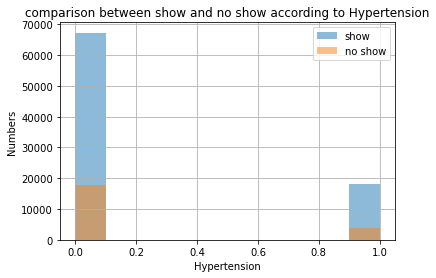

In [32]:
#compare Hypertension to show and not show
#call plot function
histplot(df['Hypertension'])
plt.title('comparison between show and no show according to Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Numbers')

<a id='conclusions'></a>
## Conclusions

The analysis confirmed that several variables were correlated with No Shows and a small percent of show. There was a small difference in mean age between patients who missed their appointments and those who made it. In addition, certain Neighbourhood was higher occurances of shows and no shows with other Neighbourhood. However, the relationship between age or gender and No Shows was contrary to what was expected. 


<a id='limitations'></a>
## limitations
i faced many challenges completing this project the first one was investigating the dataset and choose what questions i would have to ask and answer to make useful data, the second one was wrong data types one i dropped some rows all numeric columns was float so i had to change it to integer,the third one was creating histplot function to avoid repetitive code and the problem was with parameter so it took me awhile to solve it and finish the code so this the main challenges i faced and overcomed it 

In [147]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1